# Integrales en dos dimensiones

In [1]:
import time
print(' Última ejecución  ', time.asctime() )

 Last version  Mon Mar 28 09:18:40 2022


In [2]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import graph_utils as gf

### Estructura del tema

- Introducción 

- [[>]](https://www.youtube.com/watch?v=PJn_TxdpfnM&feature=youtu.be) Integral 2D

- [[>]](https://www.youtube.com/watch?v=SdQw3YZLoiw&feature=youtu.be) Teorema de Fubini 

  - Principio de Cavalieri
  
- [[>]](https://www.youtube.com/watch?v=ocexIJjzmkI) Integrales en regiones no rectangulares 

- [[>]](https://youtu.be/Q6AmxbCsPsI) Cambio de variables. Jacobiano 

  - [[>]](https://youtu.be/FKZA-RReV-A) ejemplo de cambio a polares 

### Objectivos

Extender el concepto de integral de Riemann en dos dimensiones

El Teorema de Fubini: la integral no depende del orden de integración 

Principio de Cavilieri.

Integrales en regiones no rectangulares.

Cambio de variables, polares.

Mostrar algunos ejemplos sencillos


## Introducción

### Recordatorio de la Suma De Riemann

Para calcular el *área* bajo una curva de una función real, $f(x)$, y el eje $y=0$ en un intervalo $[a, b]$, habíamos introducido la integral de una dimensión.

Que la defininmos a partir de la **suma de Riemann**. Dada la partición de un intervalo , y una función, acotada y continua en dicho intervalo, dábamos la suma de Riemman como:

$$
\mathcal{S}(f, \mathcal{P}) = \sum_{i=1, n} f(x'_i) (x_i - x_{i-1})  
$$

donde $x'_i$ es un valor aleatorio entre los valores $[x_{i-1}, x_{i}]$



También definíamos la suma superior de Riemann como:

$$
\mathcal{U}(f, \mathcal{P}) = \sum_{i=1, n} f(x'_i) (x_i - x_{i-1})  
$$

donde ahora $x'_i$ es el valor del intervalo $[x_i, x_{i-1}]$ donde la función $f(x)$ es *máxima*.

También definíamos la suma inferior de Riemann como:

$$
\mathcal{L}(f, \mathcal{P}) = \sum_{i=1, n} f(x'_i) (x_i - x_{i-1})  
$$

donde ahora $x'_i$ es el valor del intervalo $[x_i, x_{i-1}]$ donde la función $f(x)$ es *mínima*.

La función tenía integral en el intervalo $[a, b]$ si para particiones cada ver más finas, las tres sumas de Riemann convergían a un determinado valor, integral.

$$
\int_a^b \, f(x) \, \mathrm{d}x
$$

Recordad que siempre se cumple:

$$
\mathcal{L}(f, \mathcal{P}) \le \mathcal{S}(f, \mathcal{P}) \le \mathcal{U}(f, \mathcal{P}) 
$$




##  Integrales 2D 

Sabemos el área entre su gráfica de una función real, $f(x)$, en un intervalo, $[a, b], $y el eje $x$, corresponde a su integral definida:

$$
\mathcal{A} = \int_a^b \, f(x) \,\mathrm{d}x  
$$

El volumen bajo la gráfica de una función escalar, $f(x, y)$, definida en una región, $[a, b]\times [c, d]$ y el plano $(x, y)$, correspondonderá al la integral definida en dos dimensiones:

$$
\mathcal{V} = \int_a^b \int_c^d \, f(x, y) \,\mathrm{d}x \mathrm{d} y
$$




Nos preguntamos ahora cuál es volumen bajo la gráfica de la función $f(x, y)$ y el plano $(x, y)$. Sea $f(x, y) = 2 - x^2 - y^2$ y la base dada por $[-1, 1] \times [-1, 1]$
                                                                                                                                                          

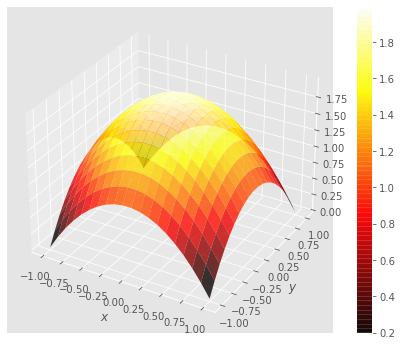

In [3]:
fun = lambda x, y : 2- x*x - y*y
gf.graph(fun, (-1., 1., 20), (-1., 1., 20));

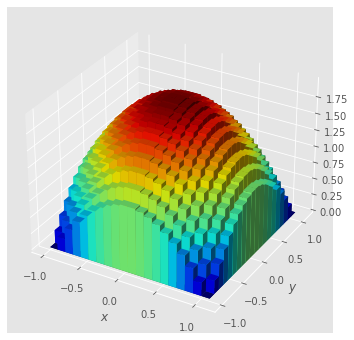

In [4]:
gf.bars3d(fun, (-1., 1., 20), (-1., 1., 20));

Podemos extender la **suma de Riemann** a la función escalar de dos dimensiones, $f(x, y)$ en la región $[a, b] \times [c, d]$, a partir de la partición de los intervalos $[a, b], \,[c, d]$

$$
\mathcal{S}(f, \mathcal{P}) = \sum_{i=1}^n \sum_{j = 1}^m \, f(x'_i, y'_j) \, \Delta x_i \, \Delta y_j 
$$

donde $(x'_i, y'_j)$ es un valor aleatorio entre los valores $[x_{i-1}, x_{i}]$ e $[y_{j-1}, y_{j}]$, y $\Delta x_i = x_i - x_{i-1}, \, \Delta y_j = y_j - y_{j-1}$

Igualmente definimos la **suma de Riemann superior e inferior**, y definimos la integral si para particiones cada vez más finas, las sumas de Riemann convergen a un determinado valor, la integral:

$$
\int_a^b \int_c^d \, f(x, y) \, \mathrm{d}x \mathrm{d}y
$$



In [5]:
a = gf.riemann_sum(fun, (-1., 1., 100), (-1., 1., 100))
print('Summa de Riemann = ', a, ', integral =', 16./3.);

Summa de Riemann =  5.386655728457595 , integral = 5.333333333333333


Notar que la notación de la integral recuerda la definición de la suma de Riemann.

$$
\mathcal{S}(f, \mathcal{P}) = \sum_{i=1}^n \sum_{j = 1}^m \, f(x'_i, y'_j) \; (x_i - x_{i-1}) \; (y_j - y_{j-1}) 
$$

$$
\int_a^b \int_c^d \, f(x, y) \, \mathrm{d}x \mathrm{d}y
$$

$$
\sum \to \int, \;\;\; \Delta x_i = x_i - x_{i-1} \to \mathrm{d}x, \;\;\; \Delta y_j = y_j - y_{j-1} \to \mathrm{d}y,
$$

Notar que las variables de integración son *mudas*, las únicas variables son los límites de integración $[a, b] \times [c, d]$.

## Teorema de Fubini

Nos dice que si una función, $f(x, y)$, es integrable en una región $[a, b] \times [c, d]$, podemos integral en el orden que consideremos.

$$
\int_a^b \int_c^d f(x, y) \, \mathrm{d}x \mathrm{d}y = \int_a^b \left[ \int_c^d \, f(x, y) \, \mathrm{d}y \right] \mathrm{d}x = \int_c^d \left[ \int_a^b \, f(x, y) \, \mathrm{d}x \right] \mathrm{d}y
$$

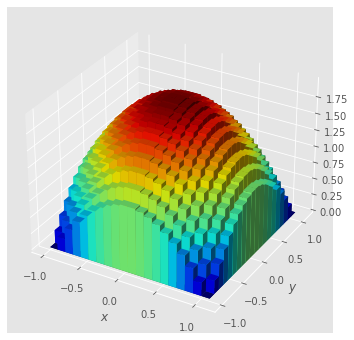

In [6]:
a = gf.bars3d(fun, (-1., 1., 20), (-1., 1., 20))

Podemos darnos cuenta que el valor entre los corchetes corresponde al área para un determinado valor fijado de $x$ o de $y$

$$
\mathcal{A}(x) =  \int_c^d \, f(x, y) \, \mathrm{d}y , \;\;\; \mathcal{A'}(y)=  \int_a^b \, f(x, y) \, \mathrm{d}x 
$$

Así:

$$
\int_a^b \int_c^d f(x, y) \, \mathrm{d}x \mathrm{d}y = \int_a^b \mathcal{A}(x) \, \mathrm{d}x = \int_c^d \mathcal{A'}(y) \, \mathrm{d}y
$$

Esto es:

$$
\int_a^b \int_c^d f(x, y) \, \mathrm{d}x \mathrm{d}y = \int_a^b \left[ \int_c^d \, f(x, y) \, \mathrm{d}y \right] \mathrm{d}x = \int_c^d \left[ \int_a^b \, f(x, y) \, \mathrm{d}x \right] \mathrm{d}y
$$

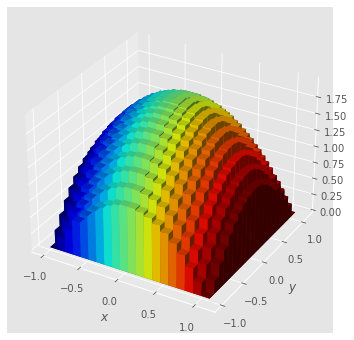

In [7]:
a = gf.bars3d(fun, (-1., 1., 20), (-1., 1., 20), acolor = 'x')

*Ejercicio*: Integra $f(x, y) = x$ en el cuadrado $[0, 1] \times [0, 1]$.

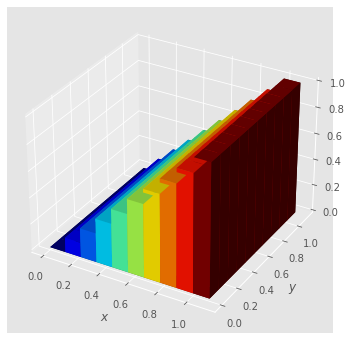

In [8]:
fun = lambda x, y : x
gf.bars3d(fun, xrange = (0, 1, 10), yrange = (0, 1, 10), acolor = 'x');

*Ejercicio*: Integra la función, $f(x, y) = y^2 \sin(x)$ en la región, $[0, \pi] \times [0, \pi]$

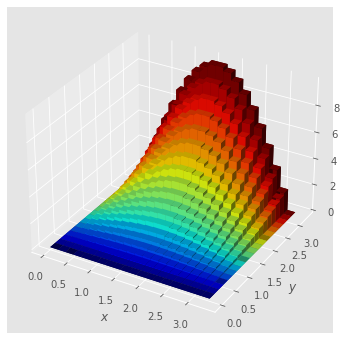

In [9]:
fun = lambda x, y : y * y * np.sin(x)
gf.bars3d(fun, xrange = (0, np.pi, 20), yrange = (0, np.pi, 20), acolor = 'y');

#### Principio de Cavalieri.

Para cuerpos de revolución, obtenidos de girar una figura alrededor de un eje.

*Ejercicio*: Calcula el volumen de un cono formado al girar el triángulo que tiene dos lados iguales, como en la figura.

*Explora*: Considera que para un determinado $z$, el radio máximo es $z^2$, ¿Cómo quedaría la figura?

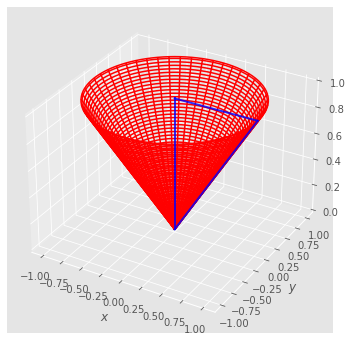

In [10]:
zrange, phirange = (0., 1., 100), (0., 2.*np.pi, 100)
xfun = lambda z, phi : z  * np.cos(phi)
yfun = lambda z, phi : z  * np.sin(phi)
zfun = lambda z, phi : z 
gf.wfsurface(xfun, yfun, zfun, zrange, phirange);
phi = 0.*np.pi/2.
trange = (0., 1., 10)
gf.line3d(lambda t: xfun(t, phi), lambda t: yfun(t, phi), lambda t: zfun(t, phi), trange, newfig = False);
gf.line3d(lambda t: xfun(t, phi), lambda t: yfun(t, phi), lambda t: zfun(1.,phi), trange, newfig = False);
gf.line3d(lambda t: 0.*t        , lambda t: 0.*t        , lambda t: zfun(t, phi), trange, newfig = False);

## Integración en una región no rectangular.

Considera que queremos integrar una función, $f(x, y)$, en la región, $R$, no necesariamente un rectángulo, por ejemplo en el siguiente triángulo:



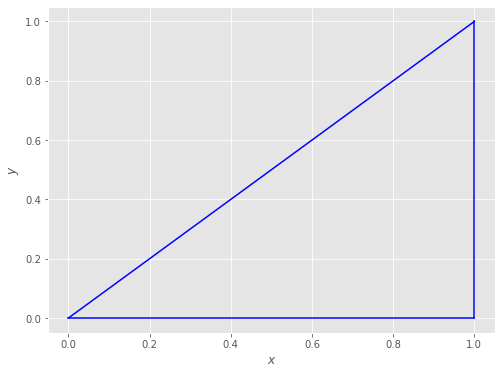

In [11]:
fx  = lambda t: t
fy0 = lambda t: 0. + 0.*t
fy1 = lambda t: t
trange = (0., 1, 10)
gf.line2d(fx, fy0, trange)
gf.line2d(fx, fy1, trange, newfig=False);
gf.line2d(lambda t: 1 + 0.*t, lambda t: t, trange, newfig=False);

Podemos definir la región como, los puntos que cumplen

$$
\{ 0 \le x \le 1, \;\; 0 \le y \le x \}
$$

Y la integral quedaría:

$$
\int \int_{R} f(x, y) \, \mathrm{d}x \mathrm{d}y = \int_0^1 \left[ \int_0^x f(x, y) \, \mathrm{d}y \right] \mathrm{d}x
$$

Las dos variables ya no son independientes, con esta definición, la variable $y$, depende de la $x$. Fijado un valor de $x$, el intervalo de integración para la $y$ es $[0, x]$.



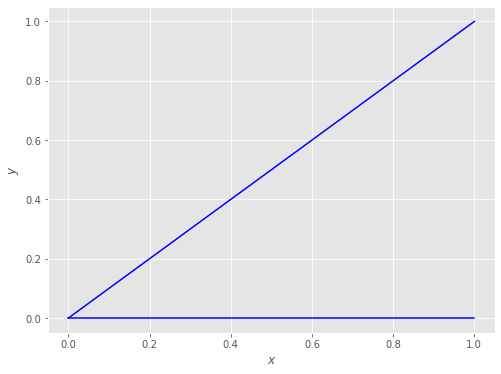

In [12]:
fx  = lambda t: t
fy0 = lambda t: 0. + 0.*t
fy1 = lambda t: t
trange = (0., 1, 10)
gf.line2d(fx, fy0, trange)
gf.line2d(fx, fy1, trange, newfig=False);
#gf.line2d(lambda t: 1 + 0.*t, lambda t: t, trange, newfig=False);

O en función de $y$

$$
\{ 0 \le y \le 1, \;\; y \le x \le 1 \}
$$

La integral queda:

$$
\int \int_{R} f(x, y) \, \mathrm{d}x \mathrm{d}y = \int_0^1 \left[ \int_{y}^1 f(x, y) \, \mathrm{d}x \right] \mathrm{d}y
$$


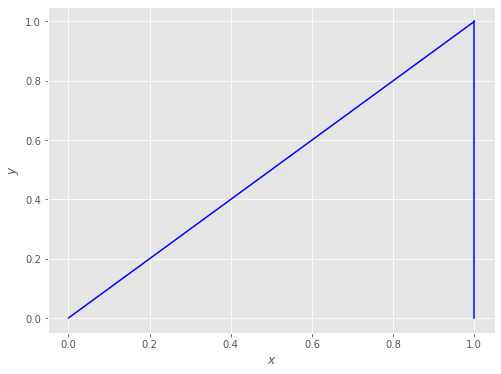

In [13]:
fy  = lambda t: t
fx0 = lambda t: t
fx1 = lambda t: 1 + 0.*t
trange = (0., 1, 10)
gf.line2d(fx0, fy, trange)
gf.line2d(fx1, fy, trange, newfig=False);

*Ejercicio*: Calcula la integral de $f(x, y) = 1$ en el triángulo anterior. ¿A qué corresponde?
    

de tipo I:
    
$$
\int_0^1 \left[ \int_0^x \, \mathrm{d}y \right] \mathrm{d}x = \int_0^1 \left. y \right|_0^x \mathrm{d}x  = \int_0^1 x \, \mathrm{d}x  = \left. \frac{x^2}{2} \right|_0^1 = \frac{1}{2}
$$

de tipo II:
    
$$
\int_0^1 \left[ \int_y^1 \, \mathrm{d}x \right] \mathrm{d}y = \int_0^1 \left. x \right|_y^1 \mathrm{d}y  = \int_0^1 (1-y) \, \mathrm{d}y  = \left. \left( y - \frac{y^2}{2} \right) \right|_0^1 = \frac{1}{2}
$$

En general si queremos integral la función, $f(x, y)$, en una región $R$, primero debemos definirla

de tipo I:
$$
\{ a \le x \le b, \;\; \phi_0(x) \le y \le \phi_1(x) \}
$$

Donde $\phi_0 (x)$ y $\phi_1(x)$ son dos funciones reales que para un valor de $x$ dan los extremos del intervalo en los que integramos $y$.

o de tipo II:
$$
\{ c \le y \le d, \;\; \xi_0(y) \le x \le \xi_1(y) \}
$$

Algunas regiones admites definirlas de los dos tipos.

Si la región, $R$, es de tipo I, la integral queda:

$$
\int_R f(x, y) \, \mathrm{d}x \mathrm{d} y = \int_a^b \left[ \int_{\phi_0(x)}^{\phi_1(x)} f(x, y) \, \mathrm{d}y \right] \mathrm{d}x
$$

Mientras que si es de tipo II:

$$
\int_R f(x, y) \, \mathrm{d}x \mathrm{d} y = \int_c^d \left[ \int_{\xi_0(y)}^{\xi_1(y)} f(x, y) \, \mathrm{d}x \right] \mathrm{d}y
$$




En el ejemplo anterior del triángulo, definido como tipo I:

$$
\phi_0(x) = 0, \;\; \phi_1(x) = x
$$

definido como tipo II:
$$
\xi_0(y) = y, \;\; \xi_1(y) = 1
$$
  

*Ejercicio*: Calcula la integral $f(x, y) = y $, en el triángulo, $\{0 \le x \le 1,  \; 0 \le y \le x \}$.


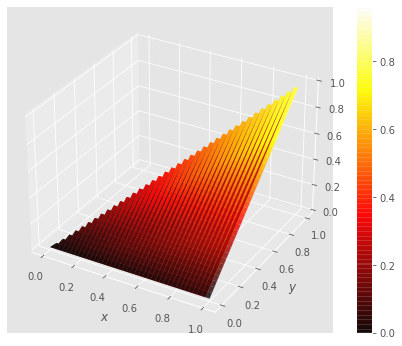

In [14]:
fun = lambda x, y : y
condition = lambda x, y : y <= x
gf.graph(fun, (0, 1, 40), (0, 1, 40), condition);

*Ejercicio*

Define la región dada por el cuarto del disco de radio $a$ en el primer cuadrante.


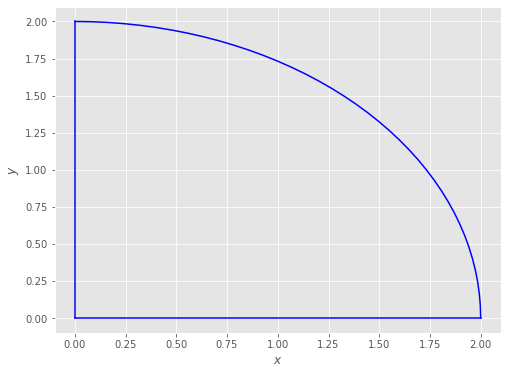

In [15]:
a      = 2.
trange = (0., np.pi/2, 40)
gf.line2d(lambda t: a*np.cos(t), lambda t: 0.*t       , trange)
gf.line2d(lambda t: a*np.cos(t), lambda t: a*np.sin(t), trange, newfig = False)
gf.line2d(lambda t: 0.*t       , lambda t: a*np.sin(t), trange, newfig = False);

De tipo I, la región se define como:

$$
\{ 0 \le x \le a, \;\; 0 \le y \le \sqrt{a^2 - x^2} \}
$$

y de tipo II:

$$
\{ 0 \le y \le a, \;\; 0 \le x \le \sqrt{a^2 - y^2} \}
$$

Si queremos calcular la integral de la función, $f(x, y) = \sqrt{a^2 - y^2}$, es mas conveniente definir la región de tipo II.

$$
\int \int_{R} \sqrt{a^2 - y^2} \mathrm{d}x\mathrm{d} y = \int_0^a \left[ \int_0^{\sqrt{a^2-y^2}} \sqrt{a^2 - y^2} \mathrm{d}x \right] \mathrm{d}y
$$

$$
\int_0^a \left. \sqrt{a^2 - y^2} \, x  \right|_0^{\sqrt{a^2-y^2}} \mathrm{d}y = 
\int_0^a a^2 - y^2 \mathrm{d}y = \left. a^2 y - \frac{y^3}{3} \right|_0^a = \frac{2 a^3}{3}
$$

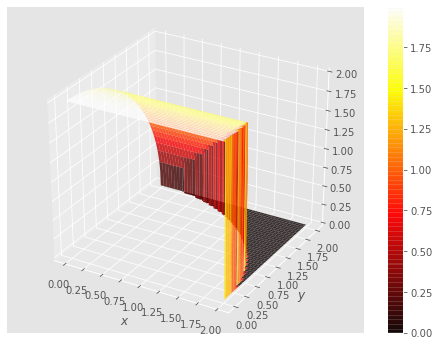

In [15]:
a = 2.
rrange = (0., a, 200)
cond   = lambda x, y: np.sqrt(x*x + y*y) <= a
fun    = lambda x, y: np.sqrt(a*a - y*y)
gf.graph(fun, rrange, rrange, cond);

## Cambio de variables. Jacobiano

En el caso anterior puede ser más conveniente realizar la integral en coordenadas polares. ¿Cómo se integra tras cambiar de coordenadas?

Observa en las figuras siguientes como la región de una sección del anillo de radio $[0.5, 1.]$ y ángulo $[0, \pi/2]$ es una región rectangular en $(r, \phi)$. 

Sin embargo las particiones rectángulares en $(r, \phi)$ se transforman en polígonos en el plano $(x, y)$. 

Para la integrar necesitamos calcular el volumen de los prismas de la summa de Riemann cuya base son esos polígonos (que al hacer las particiones más pequeñas se convierten el paralelogramos), cuya área viene dada por los dos vectores que definen sus lados.

En las siguientes celdas te mostramos como se transforman los vectores en las particiones al hacer el cambio de coordenadas.

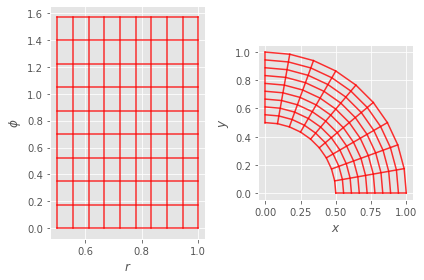

In [10]:
rsrange, phisrange = (0.5, 1, 10), (0., np.pi/2, 10)
rfun = lambda r, phi : r
pfun = lambda r, phi : phi
xfun = lambda r, phi : r * np.cos(phi)
yfun = lambda r, phi : r * np.sin(phi)
plt.subplot(1, 2, 1)
gf.wfsurface2d(rfun, pfun, rsrange, phisrange, newfig=False, xlabel='$r$', ylabel="$\phi$");
plt.subplot(1, 2, 2)
gf.wfsurface2d(xfun, yfun, rsrange, phisrange, newfig=False);
plt.gca().set_aspect(aspect = 1.); plt.tight_layout();

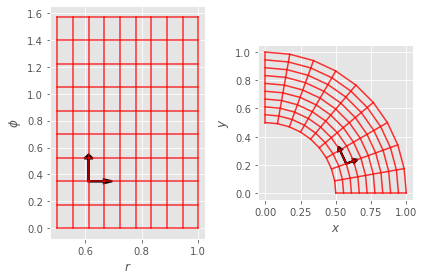

In [11]:
i, j = 2, 2
rs, phis = np.linspace(*rsrange), np.linspace(*phisrange)
plt.subplot(1, 2, 1)
gf.wfsurface2d(rfun, pfun, rsrange, phisrange, newfig=False, xlabel='$r$', ylabel="$\phi$");
ri, pj, dri, dpj = rs[i], phis[j], rs[i+1] - rs[i], phis[j+1] - phis[j]
gf.arrow(ri, pj, dri,  0., head = 0.03);
gf.arrow(ri, pj, 0. , dpj, head = 0.03);
plt.subplot(1, 2, 2)
x0, y0 = xfun(ri      , pj)      , yfun(ri      , pj)
x1, y1 = xfun(ri + dri, pj)      , yfun(ri + dri, pj)
x2, y2 = xfun(ri      , pj + dpj), yfun(ri      , pj+dpj)
gf.wfsurface2d(xfun, yfun, rsrange, phisrange, newfig=False);
gf.arrow(x0, y0, x1 - x0, y1 - y0, head = 0.03);
gf.arrow(x0, y0, x2 - x0, y2 - y0, head = 0.03);
plt.gca().set_aspect(aspect = 1.); plt.tight_layout();

El área de cada uno de las regiones en el plano $(x, y)$ viene dado por el producto escalar de los vectores de sus lados. 

Consideremos un cambio de variables $(u, v) \to (x, y)$. El vector entre $(u_0, v_0)$ y $(u_0 + \Delta u, v_0)$ (uno de los lados de los rectángulos en $(u, v)$), se transforma en el vector (que corresponde con uno de los lados del polígono en $(x,y)$):

$$
\left (x(u_0+\Delta u, v_0) - x(u_0, v_0), \;\; y(u_0+\Delta u, v_0) - y(u_0, v_0)\right)
$$

Y al ser el cambio diferenciable:

$$
\left(\frac{\partial x}{\partial u}(u_0, v_0) \, \Delta u, \;\; \frac{\partial y}{\partial u} (u_0, v_0) \, \Delta u \right)
$$

De igual forma, el vector $(u_0, v_0 + \Delta v) - (u_0, v_0)$, el otro lado del rectángulo en $(u, v)$, se transforma en el vector, el otro lado en $(x, y)$:

$$
\left(\frac{\partial x}{\partial v}(u_0, v_0) \, \Delta v, \;\; \frac{\partial y}{\partial v} (u_0, v_0) \, \Delta v \right)
$$


El área de cada uno de las regiones en el plano $(x, y)$ viene dado por el producto escalar de los vectores de sus lados. 

Consideremos un cambio de variables $(u, v) \to (x, y)$. 

El vector entre $(u_0, v_0)$ y $(u_0 + \Delta u, v_0)$ (uno de los lados de los rectángulos en $(u, v)$), se transforma en el vector (que corresponde con uno de los lados del polígono en $(x,y)$):

Al ser al cambio diferenciable, el punto queda:
$$
\left (x(u_0+\Delta u, v_0) , \;\; y(u_0+\Delta u, v_0) \,\right) = 
\left (x(u_0, v_0) + \frac{\partial x}{\partial u}(u_0, v_0) \, \Delta u,
\;\; y(u_0, v_0) + \frac{\partial y}{\partial u} (u_0, v_0) \, \Delta u \right)
$$

Y el vector:

$$
\left (x(u_0+\Delta u, v_0) , \;\; y(u_0+\Delta u, v_0) \,\right) - (x (u_0, v_0), y (x_0, v_0) \, ) = 
\left(\frac{\partial x}{\partial u}(u_0, v_0) \, \Delta u, \;\; \frac{\partial y}{\partial u} (u_0, v_0) \, \Delta u \right)
$$




El vector el vector $(u_0 + \Delta u, v_0 + \Delta v) - (u_0, v_0)$, se transforma en cartesianas:

$$
\left(\frac{\partial x}{\partial u}(u_0, v_0) \, \Delta u, \;\; \frac{\partial y}{\partial u} (u_0, v_0) \, \Delta u \right)
$$

De igual forma, el vector $(u_0, v_0 + \Delta v) - (u_0, v_0)$, el otro lado del rectángulo en $(u, v)$, se transforma en el vector, el otro lado en $(x, y)$, en cartesianas:

$$
\left(\frac{\partial x}{\partial v}(u_0, v_0) \, \Delta v, \;\; \frac{\partial y}{\partial v} (u_0, v_0) \, \Delta v \right)
$$


Los vectores de los lados en un espacio $(x, y)$ son

$$
\left( \frac{\partial x}{\partial u}, \, \frac{\partial y}{ \partial u} \right) \Delta u, \;\; 
\left( \frac{\partial x}{\partial v}, \, \frac{\partial y}{ \partial v} \right) \Delta v \;\; 
$$

Y el área que sustentan viene dada por el valor absoluto de su producto vectorial:

$$
\left| \begin{array}{cc} \frac{\partial x}{ \partial u} & \frac{\partial x}{\partial v} \\ 
\frac{\partial y}{ \partial u} & \frac{\partial y}{\partial v} 
\end{array} \right| \Delta u \Delta v
$$



Donde, 

$$
J = \left| \begin{array}{cc} \frac{\partial x}{\partial u} & \frac{\partial x}{\partial v} \\ 
\frac{\partial y}{ \partial u} & \frac{\partial y}{\partial v} 
\end{array} \right|
$$

Es el determinante de la matriz jacobiana, o jacobiano.

Como el diferencial de área siempre tiene que ser positivo, tomaremos el valor absoluto del jacobiano.



Así, cuando cambiamos de coordenadas

$$
\int_R f(x, y) \, \mathrm{d}x \mathrm{d}y = \int_{R'} f(u, v) \, |J| \mathrm{d}u \mathrm{d} v
$$

donde $R'$ es la región definida en el espacio ($u, v$), $f(u, v) = f(x(u, v), y(u, v)) $ es la función en las nuevas coordenadas, y finalmente, el diferencial de área viene dado por:

$$
\mathrm{d}x \mathrm{d} y \to |J| \mathrm{d} u \mathrm{d}v,
$$

donde $|J|$ es el valor absoluto del jacobiano del cambio de variables.

*Ejercicio*: Calcula la integral en el anillo comprendido entre los radios $[a, b]$ del primer cuadrante de la función $f(x, y) = 1$ y de la función $f(x, y) = \log(x^2 + y^2)$

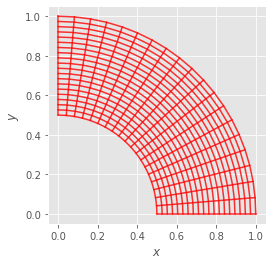

In [12]:
rsrange, phisrange = (0.5, 1, 20), (0., np.pi/2, 20)
xfun = lambda r, phi : r * np.cos(phi)
yfun = lambda r, phi : r * np.sin(phi)
gf.wfsurface2d(xfun, yfun, rsrange, phisrange);
plt.gca().set_aspect(aspect = 1.);

El cambio en Polares es:

$$
x(r, \phi) = r \cos \phi, \;\; y(r, \phi) = r \sin \phi
$$

El Jacobiano del cambio a polares es:
 
$$
\left| \begin{array}{cc} \cos \phi & - r \sin \phi\\ 
\sin \phi & r \cos \phi \end{array} \right| = r (\cos^2 \phi + \sin^2 \phi) = r
$$

Fíjate en la siguiente imagen, en cada paralelogramo, uno de los lados es $\mathrm{d}r$ y el otro $r \, \mathrm{d}\phi$. Y por lo tanto el diferencial de área es:

$$
r \mathrm{d}\phi \mathrm{d} r
$$


La región de integración está definida en polares:
$$
\{ a \le r \le b, \; 0 \le \phi \le \pi/2\}
$$

El jacobiano del cambio de coordenadas, que calculamos antes, es: $J = r$

para $f(x, y) = 1$ la integral es:
$$
\int_a^b \int_0^{\pi/2} r \mathrm{d}r \mathrm{d}\phi = \left. \frac{r^2}{2} \right|_a^b \phi \big|_0^{\pi/2} = \frac{\pi}{4} (b^2 -a^2) 
$$

que es equivalente al área de un cuarto del anillo.


La función, $f(x, y) = \log(x^2 + y^2)$, en polares es $f(r, \phi) = 2 \log r$. La integral en la sección del anillo

$$
\int_a^b \int_0^{\pi/2}  2 \log r \, r \mathrm{d}r \mathrm{d}\phi 
$$


La integral en $\phi$, es simplemente $\pi/2$

La integral en $r$ se resuelve por partes:

$$
\int 2 r \log r \, \mathrm{d} r= r^2 \log r - \int r \mathrm{d}r = r^2 \log r - \frac{r^2}{2}
$$

Luego la integral completa es:

$$
\int_a^b \int_0^{\pi/2}  2 r \log r \, \mathrm{d}r \mathrm{d}\phi 
= \frac{\pi}{2} \left( b^2 \log b - \frac{b^2}{2} - a^2 \log a + \frac{a^2}{2} \right)
$$

La siguiente figura muestra la región de integración y la gráfica de la función a integrar en la región.

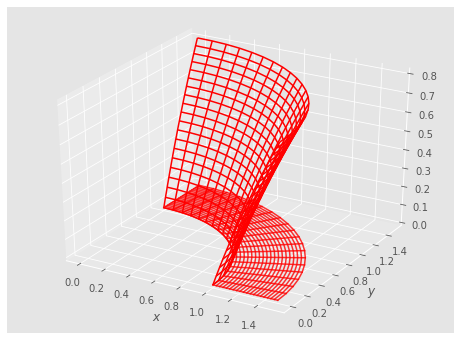

In [19]:
rrange, phirange = (1., 1.5, 20), (0, np.pi/2, 20)
xfun = lambda r, phi : r * np.cos(phi)
yfun = lambda r, phi : r * np.sin(phi)
zfun = lambda r, phi : 2 * np.log(r)
gf.wfsurface  (xfun, yfun, zfun, rrange, phirange);
gf.wfsurface2d(xfun, yfun      , rrange, phirange, newfig = False);